In [1]:
#LIBRARIES
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import scipy.stats as st
from sklearn.model_selection import train_test_split,KFold,StratifiedKFold,GridSearchCV,RandomizedSearchCV,cross_val_score
from sklearn.ensemble import RandomForestClassifier,BaggingClassifier,AdaBoostClassifier,GradientBoostingClassifier,RandomForestRegressor,BaggingRegressor,AdaBoostRegressor,GradientBoostingRegressor
from sklearn.linear_model import LinearRegression,LogisticRegression,Lasso, Ridge
from sklearn.tree import DecisionTreeClassifier,DecisionTreeRegressor
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier,KNeighborsRegressor
import sklearn.metrics as metrics
from sklearn.metrics import r2_score,roc_auc_score,classification_report,mean_squared_error,accuracy_score,confusion_matrix,precision_score,recall_score
from sklearn.preprocessing import LabelEncoder
import xgboost as xgb
from sklearn import svm
from sklearn.ensemble import GradientBoostingClassifier
from lightgbm import LGBMRegressor
import warnings
warnings.filterwarnings('ignore')

In [2]:
# READING
train = pd.read_csv("D:/R/BIG MART SALES/train.csv")
test = pd.read_csv("D:/R/BIG MART SALES/test.csv")

In [3]:
#BINDING
master=pd.concat([train,test],ignore_index=True)
print(train.shape,test.shape,master.shape)
master.head()

(8523, 12) (5681, 11) (14204, 12)


,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.30,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,DRC01,5.92,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,FDN15,17.50,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700
3,FDX07,19.20,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,NaN,Tier 3,Grocery Store,732.3800
4,NCD19,8.93,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052


In [4]:
# CHECK DTYPES 
master.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14204 entries, 0 to 14203
Data columns (total 12 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Item_Identifier            14204 non-null  object 
 1   Item_Weight                11765 non-null  float64
 2   Item_Fat_Content           14204 non-null  object 
 3   Item_Visibility            14204 non-null  float64
 4   Item_Type                  14204 non-null  object 
 5   Item_MRP                   14204 non-null  float64
 6   Outlet_Identifier          14204 non-null  object 
 7   Outlet_Establishment_Year  14204 non-null  int64  
 8   Outlet_Size                10188 non-null  object 
 9   Outlet_Location_Type       14204 non-null  object 
 10  Outlet_Type                14204 non-null  object 
 11  Item_Outlet_Sales          8523 non-null   float64
dtypes: float64(4), int64(1), object(7)
memory usage: 1.3+ MB


In [5]:
#Numerical data summary:
master.describe()

,Item_Weight,Item_Visibility,Item_MRP,Outlet_Establishment_Year,Item_Outlet_Sales
count,11765.000000,14204.000000,14204.000000,14204.000000,8523.000000
mean,12.792854,0.065953,141.004977,1997.830681,2181.288914
std,4.652502,0.051459,62.086938,8.371664,1706.499616
min,4.555000,0.000000,31.290000,1985.000000,33.290000
25%,8.710000,0.027036,94.012000,1987.000000,834.247400
50%,12.600000,0.054021,142.247000,1999.000000,1794.331000
75%,16.750000,0.094037,185.855600,2004.000000,3101.296400
max,21.350000,0.328391,266.888400,2009.000000,13086.964800


In [6]:
# check na
master.isnull().sum()/len(master)*100

Item_Identifier               0.000000
Item_Weight                  17.171219
Item_Fat_Content              0.000000
Item_Visibility               0.000000
Item_Type                     0.000000
Item_MRP                      0.000000
Outlet_Identifier             0.000000
Outlet_Establishment_Year     0.000000
Outlet_Size                  28.273726
Outlet_Location_Type          0.000000
Outlet_Type                   0.000000
Item_Outlet_Sales            39.995776
dtype: float64

In [7]:
#SEPERATING NUMERICAL VS CATEGORICAL
num=['Item_Weight','Item_Visibility','Item_MRP','Item_Outlet_Sales']
cat_data=['Item_Fat_Content','Item_Type','Outlet_Identifier','Outlet_Size','Outlet_Location_Type','Outlet_Type']
final=master[num+cat_data]

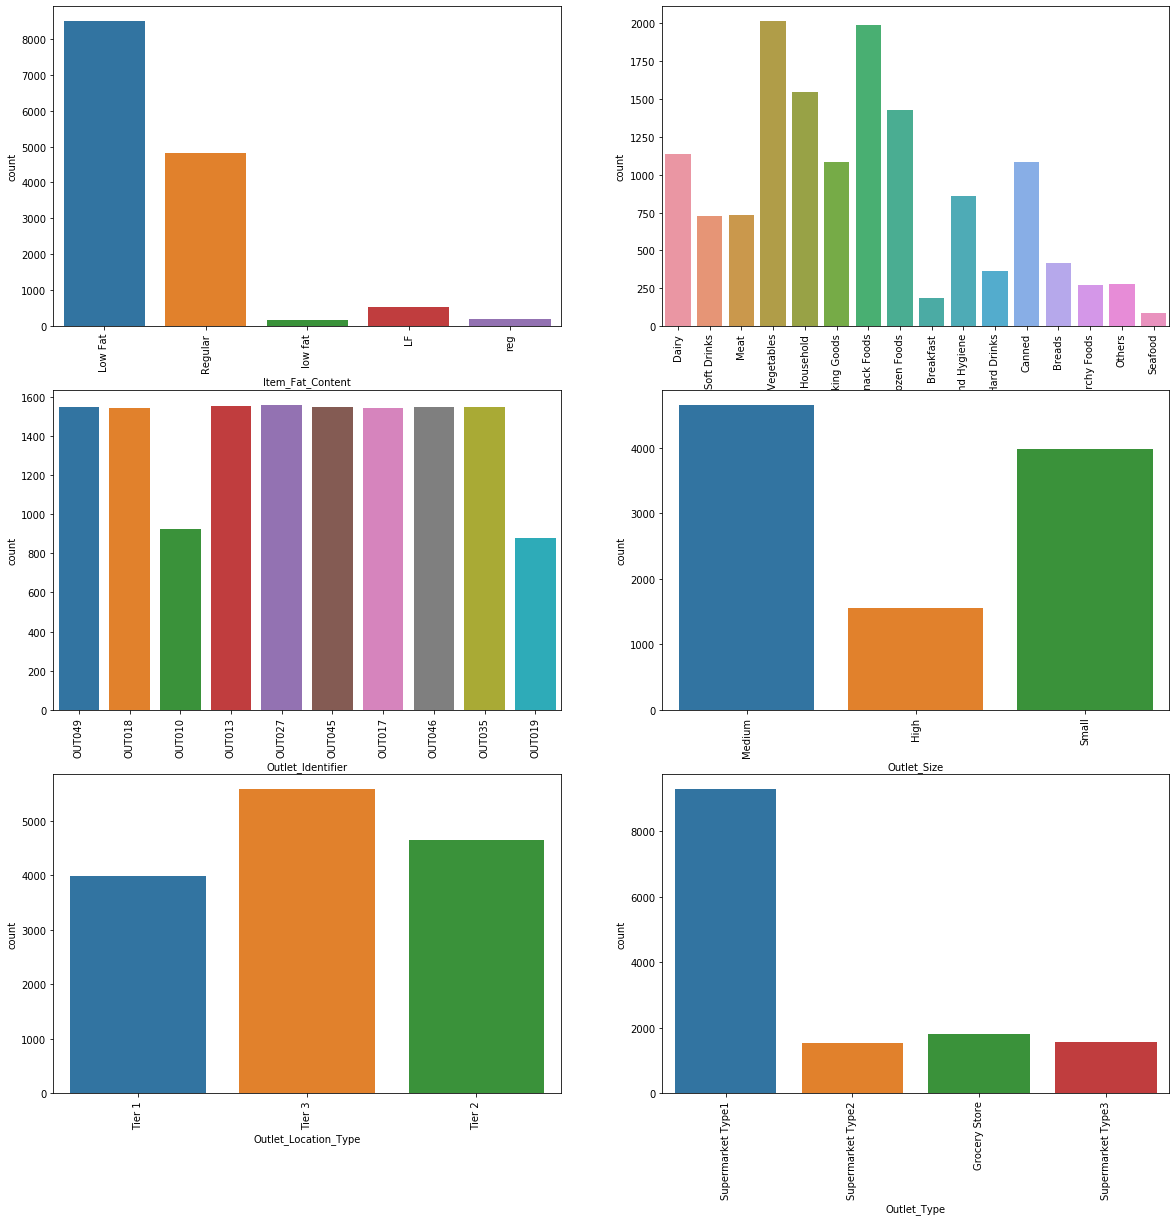

In [8]:
## Categorical Variables

fig, ax=plt.subplots(3,2,figsize=(20,20))
for variable,subplot in zip(cat_data,ax.flatten()):
    sns.countplot(final[variable],ax=subplot)
    for label in subplot.get_xticklabels():
        label.set_rotation(90)

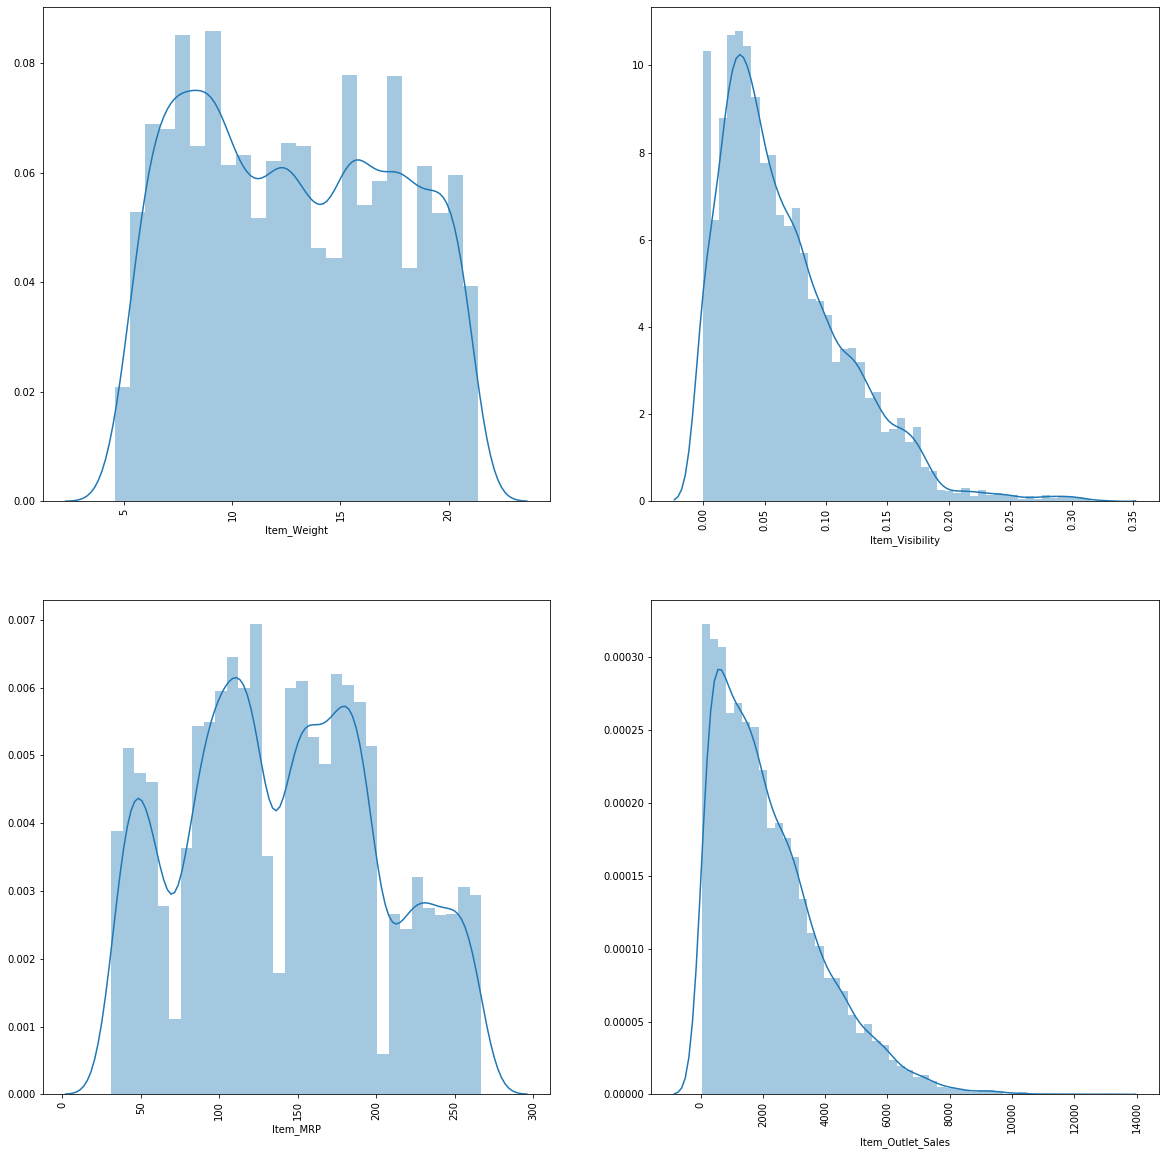

In [9]:
# NUMERIC
fig, ax=plt.subplots(2,2,figsize=(20,20))
for var,subplot in zip(num,ax.flatten()):
    sns.distplot(final[var],ax=subplot)
    for label in subplot.get_xticklabels():
        label.set_rotation(90)

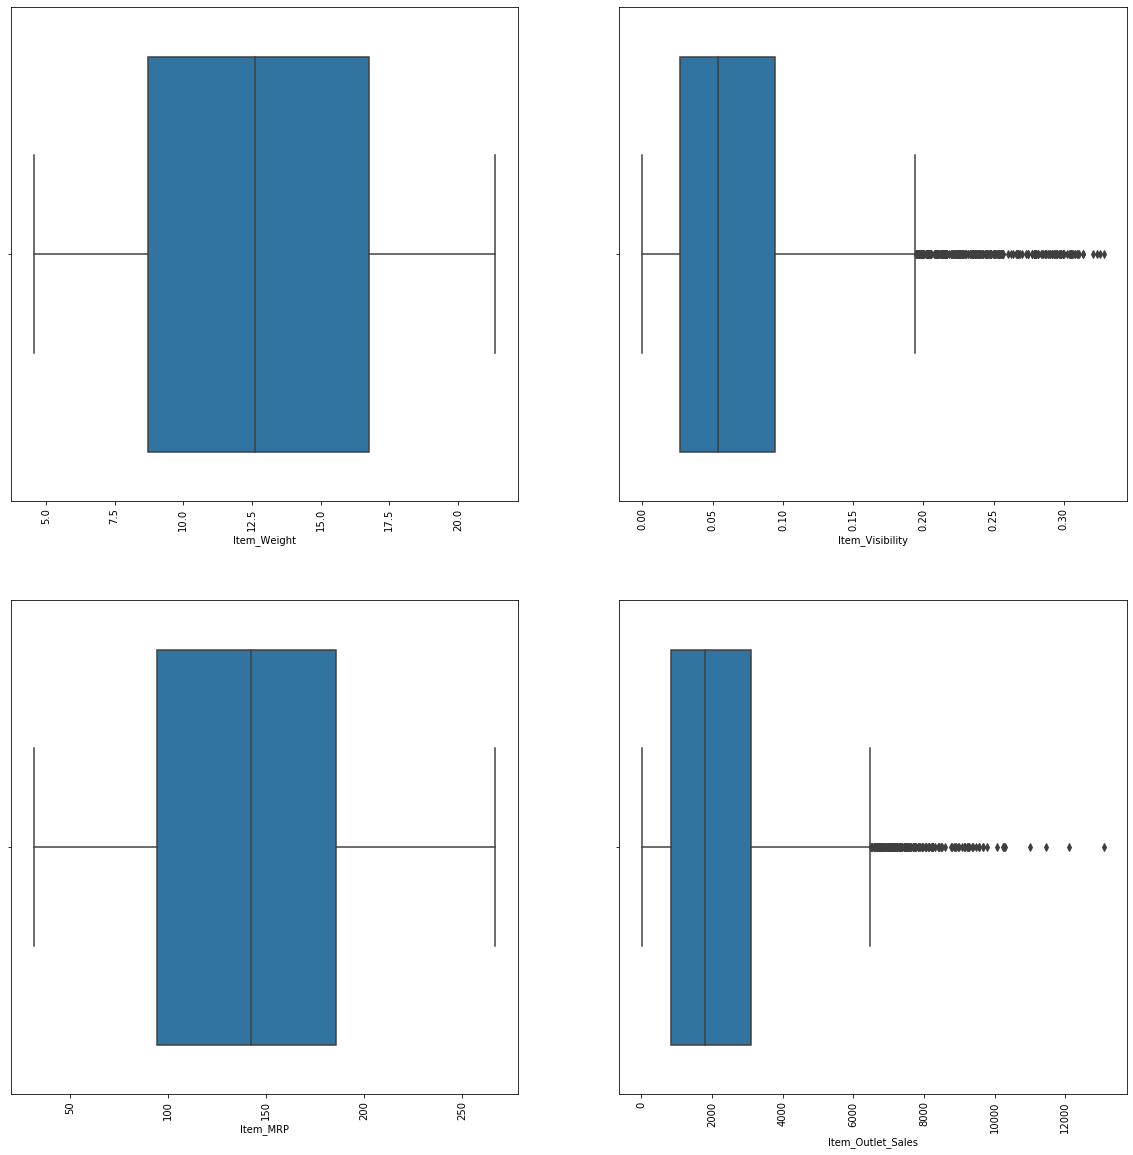

In [10]:
# BOXPLOT

fig, ax=plt.subplots(2,2,figsize=(20,20))
for var,subplot in zip(num,ax.flatten()):
    sns.boxplot(final[var],ax=subplot)
    for label in subplot.get_xticklabels():
        label.set_rotation(90)

Item_Outlet_Sales in Thousands ('000)

--------------------Item_Fat_Content  vs  Item_Outlet_Sales--------------------


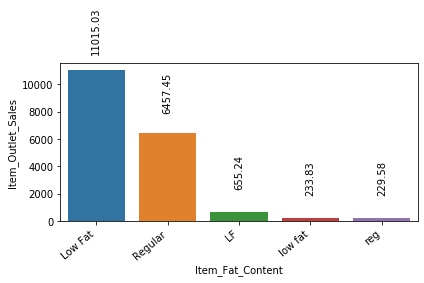


Maximum Sales : 
                  Item_Outlet_Sales
Item_Fat_Content                   
Low Fat                11015.025161

--------------------------------------------------
Item_Outlet_Sales in Thousands ('000)

--------------------Item_Type  vs  Item_Outlet_Sales--------------------


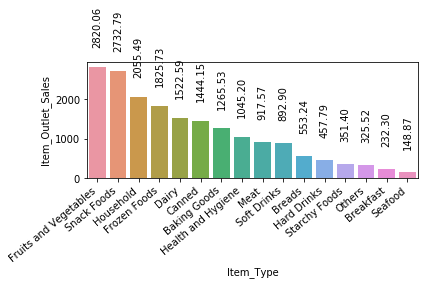


Maximum Sales : 
                       Item_Outlet_Sales
Item_Type                               
Fruits and Vegetables        2820.059817

--------------------------------------------------
Item_Outlet_Sales in Thousands ('000)

--------------------Outlet_Identifier  vs  Item_Outlet_Sales--------------------


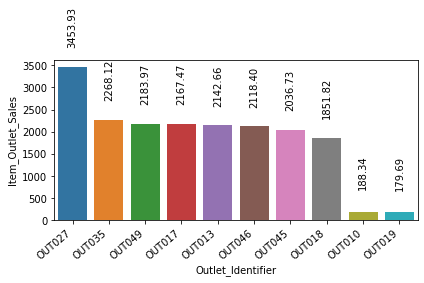


Maximum Sales : 
                   Item_Outlet_Sales
Outlet_Identifier                   
OUT027                   3453.926051

--------------------------------------------------
Item_Outlet_Sales in Thousands ('000)

--------------------Outlet_Size  vs  Item_Outlet_Sales--------------------


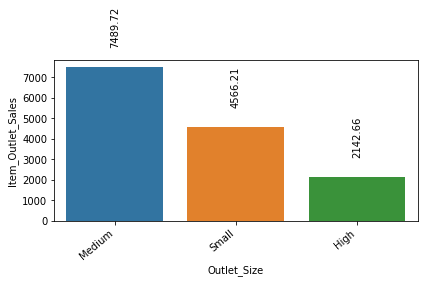


Maximum Sales : 
             Item_Outlet_Sales
Outlet_Size                   
Medium             7489.718692

--------------------------------------------------
Item_Outlet_Sales in Thousands ('000)

--------------------Outlet_Location_Type  vs  Item_Outlet_Sales--------------------


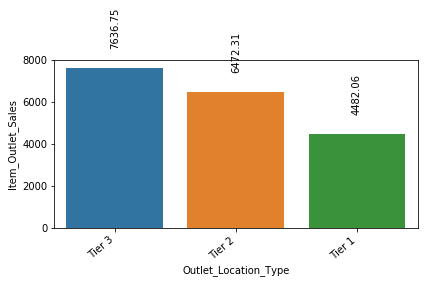


Maximum Sales : 
                      Item_Outlet_Sales
Outlet_Location_Type                   
Tier 3                      7636.752632

--------------------------------------------------
Item_Outlet_Sales in Thousands ('000)

--------------------Outlet_Type  vs  Item_Outlet_Sales--------------------


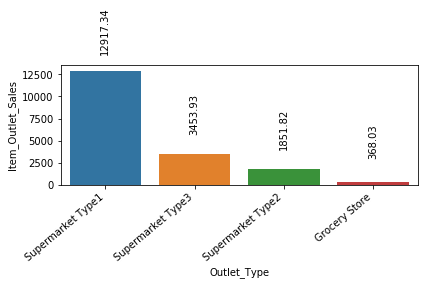


Maximum Sales : 
                   Item_Outlet_Sales
Outlet_Type                         
Supermarket Type1       12917.342263

--------------------------------------------------


In [11]:
## NUMERICAL VS CATEGORY

for cat in cat_data:
    print("Item_Outlet_Sales in Thousands ('000)")
    print()
    print("-"*20 + cat + '  vs' + '  Item_Outlet_Sales' + "-"*20)
    output = final[[cat,'Item_Outlet_Sales']].groupby([cat]).apply(lambda x: x['Item_Outlet_Sales'].sum()/1000).sort_values(ascending=False)
    output = pd.DataFrame(output)
    output.columns = ['Item_Outlet_Sales']
    ax = sns.barplot(output.index,'Item_Outlet_Sales', data =output)
    ax.set_xticklabels(ax.get_xticklabels(), rotation=40, ha="right")
    for p in ax.patches:
        ax.annotate("%.2f" % p.get_height(), (p.get_x() + p.get_width()/ 2., p.get_height()),ha='center', va='center', rotation=90, xytext=(0,40), textcoords='offset points')  #vertical bars
    plt.tight_layout()
    plt.show()
    print()
    print("Maximum Sales : ")
    print(output.head(1))
    print()
    print("-" *50)
    
 


######CONCLUSION#########
#SALES OF FRUITS AND VEGITABLE IS HIGH
#SALES OF LOW FAT CONTENT IS HIGH
# SALES OF OUTLET 27 IS HIGH
# SALES OF OUTLET SIZE MEDIUM IS HIGH
# SALES OF LOACTION TIER1 IS HIGH
# SALES OF SUPERMARKETTYPE1 IS HIGH

In [12]:
##BIINING ITEM FAT CONTENT###
ge=['Item_Fat_Content']
gs={'LF':'Low Fat','reg':'Regular','low fat':'Low Fat'}
for col in ge:
    master[col]=master[col].replace(gs)
    
    master.Item_Fat_Content.value_counts()

In [13]:
## OULET SALES ACCORDING TO OUTLET IDENTIFIER,OUTLET ESTABLISHMENT YEAR

year_store_sales = master[['Outlet_Identifier','Outlet_Establishment_Year','Item_Outlet_Sales']].groupby(['Outlet_Identifier','Outlet_Establishment_Year']).apply(lambda x: x['Item_Outlet_Sales'].sum()/1000).sort_values(ascending=False)
year_store_sales = pd.DataFrame(year_store_sales)
year_store_sales.columns = ['Outlet_Sales']
year_store_sales


,,Outlet_Sales
Outlet_Identifier,Outlet_Establishment_Year,
OUT027,1985,3453.926051
OUT035,2004,2268.122935
OUT049,1999,2183.969810
OUT017,2007,2167.465294
OUT013,1987,2142.663578
OUT046,1997,2118.395168
OUT045,2002,2036.725477
OUT018,2009,1851.822830
OUT010,1998,188.340172


In [14]:
#OUTLET SALES ACCORDING TO ITEM FAT CONTENT,ITEM_TYPE
item_store_sales = master[['Item_Type','Item_Fat_Content','Item_Outlet_Sales']].groupby(['Item_Type','Item_Fat_Content']).apply(lambda x: x['Item_Outlet_Sales'].sum()/1000).sort_values(ascending=False)
item_store_sales = pd.DataFrame(item_store_sales)
item_store_sales.columns = ['Outlet_Sales']
item_store_sales.head(10)


Outlet_Sales
Item_Type             Item_Fat_Content              
Household             Low Fat            2055.493713
Snack Foods           Low Fat            1669.089359
Fruits and Vegetables Regular            1445.144200
                      Low Fat            1374.915616
Snack Foods           Regular            1063.696728
Health and Hygiene    Low Fat            1045.200138
Frozen Foods          Low Fat             952.890963
Dairy                 Low Fat             896.682795
Frozen Foods          Regular             872.843826
Soft Drinks           Low Fat             761.259075

7.0
-1.5 26.5


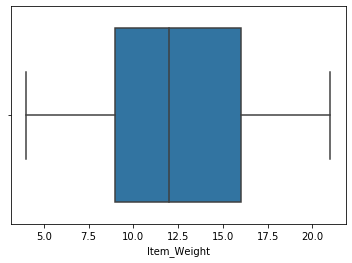

In [15]:
##MISSSING VALUE TRATMENT#####

#1.Item Weight
mis=master[master.Item_Weight.isna()]
mis
# REPLACE LOAN AMT WITH RANDOM VALUE WITH RESPECT TO MEAN STD AND ISNULL
master.Item_Weight.describe()
mean = master["Item_Weight"].mean()
std = master["Item_Weight"].std()
is_null = master["Item_Weight"].isnull().sum()
# compute random numbers between the mean, std and is_null
rand_Item_Weight = np.random.randint(mean - std, mean + std, size = is_null)
 # fill NaN values in Item_Weight column with random values generated
Item_Weight_slice = master["Item_Weight"].copy()
Item_Weight_slice[np.isnan(Item_Weight_slice)] = rand_Item_Weight
master["Item_Weight"] = Item_Weight_slice
master["Item_Weight"] = master["Item_Weight"].astype(int)

###OUTLIER IDENTIFICATION###

sorted(master['Item_Weight'])
quantile1,quantile3=np.percentile(master.Item_Weight,[25,75])

#IQR
iqr=quantile3-quantile1
print(iqr)
#UPPER AND LOWER BOUND
lb=quantile1 -(1.5 * iqr)
up=quantile3 +(1.5 * iqr)
print(lb,up)

###TREATMENT###

master.Item_Weight.loc[master.Item_Weight > up]=up
sns.boxplot(master['Item_Weight'])

0.067001571
-0.073466674 0.19453961


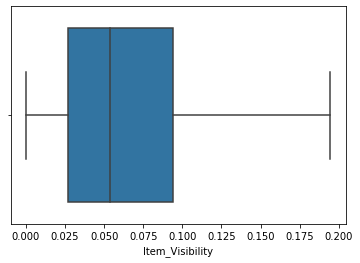

In [16]:
#OUTLIER TREATMENT###

#.Item_Visibility

###OUTLIER IDENTIFICATION###

sorted(master['Item_Visibility'])
quantile1,quantile3=np.percentile(master.Item_Visibility,[25,75])

#IQR
iqr=quantile3-quantile1
print(iqr)
#UPPER AND LOWER BOUND
lb=quantile1 -(1.5 * iqr)
up=quantile3 +(1.5 * iqr)
print(lb,up)

###TREATMENT###

master.Item_Visibility.loc[master.Item_Visibility > up]=up
sns.boxplot(master['Item_Visibility'])

In [17]:
#2.Outlet SIZE
mt=master[master.Outlet_Size.isna()]
mt
master['Outlet_Size'] = master['Outlet_Size'].fillna( master['Outlet_Size'].dropna().mode().values[0] )
master.Outlet_Size.value_counts()

Medium    8671
Small     3980
High      1553
Name: Outlet_Size, dtype: int64

In [18]:
### FEATURE ENGINEERING##

perishable = ["Breads", "Breakfast", "Dairy", "Fruits and Vegetables", "Meat", "Seafood"]
non_perishable = ["Baking Goods", "Canned", "Frozen Foods", "Hard Drinks", "Health and Hygiene", "Household", "Soft Drinks"]
item_list =[] 
for i in master['Item_Type']:
    if i in perishable:
        item_list.append('perishable')
    elif (i in non_perishable):
        item_list.append('non_perishable')
    else:
        item_list.append('not_sure')
        
master['Item_Type_new'] = item_list
master['Price_per_Unit']=master.Item_MRP / master.Item_Weight
master['Year_Diff']=2013 - master.Outlet_Establishment_Year
master.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales,Item_Type_new,Price_per_Unit,Year_Diff
0,FDA15,9.0,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380,perishable,27.756578,14
1,DRC01,5.0,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228,non_perishable,9.653840,4
2,FDN15,17.0,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700,perishable,8.330471,14
3,FDX07,19.0,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,Medium,Tier 3,Grocery Store,732.3800,perishable,9.583947,15
4,NCD19,8.0,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052,non_perishable,6.732675,26


In [19]:
# Labels Encoding

cat=['Item_Fat_Content','Outlet_Size','Outlet_Location_Type','Item_Type_new','Outlet_Type','Item_Type','Outlet_Identifier']

le=LabelEncoder()
for i in cat:
    master[i]=le.fit_transform(master[i])
    

In [20]:
#LOG TRANSFORMATION OF TARGET VARIABLE

master['Item_Outlet_Sales']=np.log1p(master['Item_Outlet_Sales'])
master.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales,Item_Type_new,Price_per_Unit,Year_Diff
0,FDA15,9.0,0,0.016047,4,249.8092,9,1999,1,0,1,8.225808,2,27.756578,14
1,DRC01,5.0,1,0.019278,14,48.2692,3,2009,1,2,2,6.096776,0,9.653840,4
2,FDN15,17.0,0,0.016760,10,141.6180,9,1999,1,0,1,7.648868,2,8.330471,14
3,FDX07,19.0,1,0.000000,6,182.0950,0,1998,1,2,0,6.597664,2,9.583947,15
4,NCD19,8.0,0,0.000000,9,53.8614,1,1987,0,2,1,6.903451,0,6.732675,26


In [21]:
master.skew(axis=0,skipna=True)

Item_Weight                  0.110715
Item_Fat_Content             0.613645
Item_Visibility              0.815193
Item_Type                    0.099574
Item_MRP                     0.130728
Outlet_Identifier           -0.059994
Outlet_Establishment_Year   -0.396465
Outlet_Size                 -0.087077
Outlet_Location_Type        -0.209053
Outlet_Type                  0.927344
Item_Outlet_Sales           -0.882266
Item_Type_new                0.353263
Price_per_Unit               1.434060
Year_Diff                    0.396465
dtype: float64

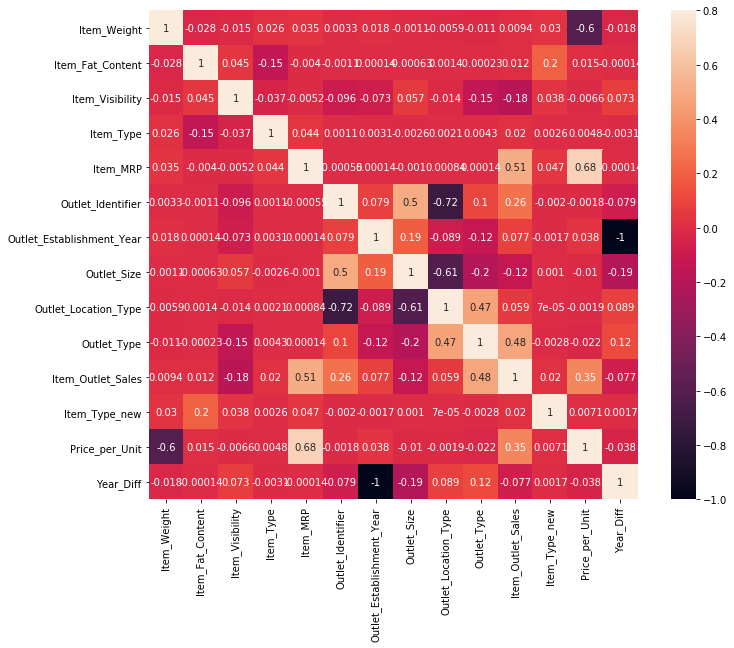

In [22]:
#####CORRELATION MATRIX######
#correlation matrix
corrmat = master.corr()
f, ax = plt.subplots(figsize=(12, 9))
sns.heatmap(corrmat, vmax=.8,annot = True,square=True);

In [23]:
##########MODEL BUILDING###########

master= pd.get_dummies(master, columns=cat)
X = master[master['Item_Outlet_Sales'].isnull()!=True].drop(['Item_Identifier','Item_Outlet_Sales'], axis=1)
y = master[master['Item_Outlet_Sales'].isnull()!=True]['Item_Outlet_Sales']

X_test = master[master['Item_Outlet_Sales'].isnull()==True].drop(['Item_Identifier','Item_Outlet_Sales'], axis=1)

X.shape, y.shape, X_test.shape


((8523, 47), (8523,), (5681, 47))

In [24]:
########SPLITTING#####
x_train, x_val, y_train, y_val = train_test_split(X, y, test_size=0.2)


In [25]:
##########RIDGE REGRESSION##########

list1=[0.0018,0.002,0.005,0.08,0.09,0.1,0.5]
list2=[]
for i in list1:
    ridge_reg = Ridge(alpha=i,normalize=True)
    ridge_reg.fit(x_train,y_train)
    y_pred_r=ridge_reg.predict(x_val)
    r2score_r= r2_score(y_val,y_pred_r)
    list2.append(r2score_r)

ridge_rscore_df=pd.DataFrame({"ALPHA":list1,"R2SCORE":list2})
ridge_rscore_df 

,ALPHA,R2SCORE
0,0.0018,0.735278
1,0.0020,0.735285
2,0.0050,0.735372
3,0.0800,0.733525
4,0.0900,0.733041
5,0.1000,0.732527
6,0.5000,0.698480


In [26]:
#####LINEAR REGRESSION###
#LOGISTIC####
logmodel = LinearRegression()
logmodel.fit(x_train,y_train)
predictions = logmodel.predict(x_val)

model_score = logmodel.score(x_train,y_train)
# Have a look at R sq to give an idea of the fit ,
# Explained variance score: 1 is perfect prediction
print('R2 sq: ',model_score)
# Accuracy Score
acc_log = round(logmodel.score(x_train, y_train) * 100, 2)
print('Acc: ',acc_log)

R2 sq:  0.7174427454231919
Acc:  71.74


In [26]:
## SELECTING THE BEST MODEL###
from sklearn.linear_model import ElasticNet
from sklearn.svm import SVR
model_df = {'Name':['LR', 'Ridge', 'Lasso', 'E_Net','SVR','Dec_Tree','RF','Bagging_Reg','AdaBoost','Grad_Boost','Lgbm'],
             'Model' : [LinearRegression(), Ridge(alpha=0.05,solver='cholesky'), Lasso(alpha=0.01) ,ElasticNet(alpha=0.01,l1_ratio=0.5),
                     SVR(epsilon=15,kernel='linear'),DecisionTreeRegressor(),
                     RandomForestRegressor(),BaggingRegressor(max_samples=70),AdaBoostRegressor(),GradientBoostingRegressor(),LGBMRegressor()]}

model_df = pd.DataFrame(model_df)
model_df['Cross_val_score_mean'], model_df['Cross_val_score_STD'] = 0,0
model_df

,Name,Model,Cross_val_score_mean,Cross_val_score_STD
0,LR,"LinearRegression(copy_X=True, fit_intercept=Tr...",0,0
1,Ridge,"Ridge(alpha=0.05, copy_X=True, fit_intercept=T...",0,0
2,Lasso,"Lasso(alpha=0.01, copy_X=True, fit_intercept=T...",0,0
3,E_Net,"ElasticNet(alpha=0.01, copy_X=True, fit_interc...",0,0
4,SVR,"SVR(C=1.0, cache_size=200, coef0=0.0, degree=3...",0,0
5,Dec_Tree,"DecisionTreeRegressor(ccp_alpha=0.0, criterion...",0,0
6,RF,"RandomForestRegressor(bootstrap=True, ccp_alph...",0,0
7,Bagging_Reg,"BaggingRegressor(base_estimator=None, bootstra...",0,0
8,AdaBoost,"AdaBoostRegressor(base_estimator=None, learnin...",0,0
9,Grad_Boost,"GradientBoostingRegressor(alpha=0.9, ccp_alpha...",0,0


In [27]:
for m in range(0,model_df.shape[0]):
    print(model_df['Name'][m])
    score=cross_val_score(model_df['Model'][m] , x_train,y_train , cv=10 , scoring='neg_mean_squared_error')
    score_cross=np.sqrt(-score)
    model_df['Cross_val_score_mean'][m] = np.mean(score_cross)
    model_df['Cross_val_score_STD'][m] = np.std(score_cross)
    
model_df

LR
Ridge
Lasso
E_Net
SVR
Dec_Tree
RF
Bagging_Reg
AdaBoost
Grad_Boost
Lgbm


,Name,Model,Cross_val_score_mean,Cross_val_score_STD
0,LR,"LinearRegression(copy_X=True, fit_intercept=Tr...",0,0
1,Ridge,"Ridge(alpha=0.05, copy_X=True, fit_intercept=T...",0,0
2,Lasso,"Lasso(alpha=0.01, copy_X=True, fit_intercept=T...",0,0
3,E_Net,"ElasticNet(alpha=0.01, copy_X=True, fit_interc...",0,0
4,SVR,"SVR(C=1.0, cache_size=200, coef0=0.0, degree=3...",1,0
5,Dec_Tree,"DecisionTreeRegressor(ccp_alpha=0.0, criterion...",0,0
6,RF,"RandomForestRegressor(bootstrap=True, ccp_alph...",0,0
7,Bagging_Reg,"BaggingRegressor(base_estimator=None, bootstra...",0,0
8,AdaBoost,"AdaBoostRegressor(base_estimator=None, learnin...",0,0
9,Grad_Boost,"GradientBoostingRegressor(alpha=0.9, ccp_alpha...",0,0


In [28]:
model_df.sort_values(by=['Cross_val_score_mean'])

,Name,Model,Cross_val_score_mean,Cross_val_score_STD
0,LR,"LinearRegression(copy_X=True, fit_intercept=Tr...",0,0
1,Ridge,"Ridge(alpha=0.05, copy_X=True, fit_intercept=T...",0,0
2,Lasso,"Lasso(alpha=0.01, copy_X=True, fit_intercept=T...",0,0
3,E_Net,"ElasticNet(alpha=0.01, copy_X=True, fit_interc...",0,0
5,Dec_Tree,"DecisionTreeRegressor(ccp_alpha=0.0, criterion...",0,0
6,RF,"RandomForestRegressor(bootstrap=True, ccp_alph...",0,0
7,Bagging_Reg,"BaggingRegressor(base_estimator=None, bootstra...",0,0
8,AdaBoost,"AdaBoostRegressor(base_estimator=None, learnin...",0,0
9,Grad_Boost,"GradientBoostingRegressor(alpha=0.9, ccp_alpha...",0,0
10,Lgbm,"LGBMRegressor(boosting_type='gbdt', class_weig...",0,0


In [27]:
### GBM###
from sklearn import ensemble
# Fit regression model
params = {'n_estimators': 500, 'max_depth': 4, 'min_samples_split': 2,
          'learning_rate': 0.01, 'loss': 'ls'}
model = ensemble.GradientBoostingRegressor(**params)

model.fit(x_train, y_train)


from sklearn.metrics import mean_squared_error, r2_score
model_score = model.score(x_train,y_train)

# Have a look at R sq to give an idea of the fit ,
# Explained variance score: 1 is perfect prediction
print('R2 sq: ',model_score)
y_predicted = model.predict(x_val)

# The mean squared error
print("Mean squared error: %.2f"% mean_squared_error(y_val, y_predicted))
# Explained variance score: 1 is perfect prediction
print('Test Variance score: %.2f' % r2_score(y_val, y_predicted))
# Accuracy Score
acc_log = round(model.score(x_train, y_train) * 100, 2)
print('Acc: ',acc_log)

R2 sq:  0.7565574363196618
Mean squared error: 0.26
Test Variance score: 0.75
Acc:  75.66


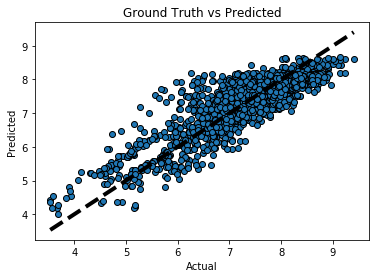

In [28]:
fig, ax = plt.subplots()
ax.scatter(y_val, y_predicted, edgecolors=(0, 0, 0))
ax.plot([y_val.min(), y_val.max()], [y_val.min(), y_val.max()], 'k--', lw=4)
ax.set_xlabel('Actual')
ax.set_ylabel('Predicted')
ax.set_title("Ground Truth vs Predicted")
plt.show()

In [ ]:
##########TUNNING#########
gbmr = GradientBoostingRegressor()
gb_grid = {
    'n_estimators'     : range(100,1000,100),
    'max_depth'        : [5,10,15,20,25,35,None],
    'loss'             :['ls','lad','huber','quantile'],
    'subsample'        : [0.8, 0.9, 1.0],
    'min_samples_leaf' : [1,2,5,10],
    'min_samples_split': [2,5,10,15,100],
    'learning_rate'    : [0.1,0.03,0.4,0.5,0.7]

}

search = RandomizedSearchCV(gbmr,gb_grid,scoring='neg_mean_squared_error',cv=3, verbose=2, n_jobs=-1, n_iter = 100)
search.fit(x_train,y_train)
print(search.best_params_)


Fitting 3 folds for each of 100 candidates, totalling 300 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  25 tasks      | elapsed:  3.1min


In [ ]:
gbs=GradientBoostingRegressor()


